In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('dea.csv')
df.describe()

,Control1,Control2,Control3,Control4,Control5,Control6,Control7,Control8,Control9,Control10,...,Treatment16,Treatment17,Treatment18,Treatment19,Treatment20,Treatment21,Treatment22,Treatment23,Treatment24,Treatment25
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.750000,51.070000,51.560000,54.760000,49.230000,53.500000,53.330000,55.340000,53.680000,49.940000,...,48.810000,51.630000,51.000000,47.810000,57.510000,47.100000,54.130000,51.330000,51.130000,45.910000
std,30.049244,29.373339,28.228619,25.243509,28.817382,25.742901,27.448043,26.296376,28.451937,29.238421,...,25.830721,27.261789,25.914389,29.383805,26.962186,26.478312,26.426821,28.009037,29.068938,26.601471
min,5.000000,5.000000,5.000000,8.000000,5.000000,6.000000,5.000000,6.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7.000000,6.000000,5.000000
25%,20.750000,21.750000,27.500000,33.500000,20.750000,32.500000,27.750000,36.000000,29.000000,29.250000,...,27.750000,27.500000,28.000000,19.000000,31.500000,24.000000,32.750000,23.500000,27.000000,23.000000
50%,51.500000,54.000000,51.000000,55.500000,49.000000,53.000000,59.000000,57.000000,52.500000,46.500000,...,48.500000,52.000000,52.500000,46.000000,61.000000,45.500000,55.000000,53.500000,47.500000,44.000000
75%,77.250000,78.000000,76.000000,76.000000,71.500000,76.000000,75.250000,75.500000,79.500000,70.250000,...,69.250000,75.000000,74.250000,71.250000,81.000000,64.250000,73.500000,77.250000,77.250000,66.500000
max,98.000000,99.000000,99.000000,96.000000,99.000000,99.000000,97.000000,99.000000,99.000000,99.000000,...,97.000000,99.000000,99.000000,99.000000,97.000000,99.000000,98.000000,99.000000,98.000000,98.000000


In [30]:
control = [c for c in df.columns if 'Control' in c]
treatment = [c for c in df.columns if 'Treatment' in c]

print("Control Columns: ",control)
print("Treatment Columns: ", treatment)

Control Columns:  ['Control1', 'Control2', 'Control3', 'Control4', 'Control5', 'Control6', 'Control7', 'Control8', 'Control9', 'Control10', 'Control11', 'Control12', 'Control13', 'Control14', 'Control15', 'Control16', 'Control17', 'Control18', 'Control19', 'Control20', 'Control21', 'Control22', 'Control23', 'Control24', 'Control25']
Treatment Columns:  ['Treatment1', 'Treatment2', 'Treatment3', 'Treatment4', 'Treatment5', 'Treatment6', 'Treatment7', 'Treatment8', 'Treatment9', 'Treatment10', 'Treatment11', 'Treatment12', 'Treatment13', 'Treatment14', 'Treatment15', 'Treatment16', 'Treatment17', 'Treatment18', 'Treatment19', 'Treatment20', 'Treatment21', 'Treatment22', 'Treatment23', 'Treatment24', 'Treatment25']


In [32]:
df['Control Mean'] = df[control].mean(axis=1)
df['Treatment Mean'] = df[treatment].mean(axis=1)

print(df[['Control Mean', 'Treatment Mean']].head())

   Control Mean  Treatment Mean
0         53.52           54.88
1         47.08           63.28
2         45.16           47.92
3         51.44           53.56
4         48.04           53.24


In [33]:
epsilon = 1e-6
df['Fold_Change'] = (df['Treatment Mean']+epsilon) / (df['Control Mean']+epsilon)
df['log2FC'] = np.log2(df['Fold_Change'])

print(df[['Fold_Change', 'log2FC']].head())

   Fold_Change    log2FC
0     1.025411  0.036202
1     1.344095  0.426635
2     1.061116  0.085582
3     1.041213  0.058265
4     1.108243  0.148274


In [34]:
up_regulated = df[df['log2FC'] >= 1.6]
down_regulated = df[df['log2FC'] < 0.67]

print(f"Up: {len(up_regulated)}, Down: {len(down_regulated)}")
print("\nTop 5 Up: ", up_regulated[['Gene','Fold_Change']].head().values)
print("\nTop 5 Down: ", down_regulated[['Gene','Fold_Change']].head().values)

display(up_regulated[['Gene', 'Control Mean', 'Treatment Mean', 'Fold_Change', 'log2FC']])
display(down_regulated[['Gene', 'Control Mean', 'Treatment Mean', 'Fold_Change', 'log2FC']])

Up: 0, Down: 100

Top 5 Up:  []

Top 5 Down:  [['Gene1' 1.0254110608107052]
 ['Gene2' 1.3440951498705365]
 ['Gene3' 1.0611160305333032]
 ['Gene4' 1.041213062962421]
 ['Gene5' 1.1082431284712089]]


,Gene,Control Mean,Treatment Mean,Fold_Change,log2FC


,Gene,Control Mean,Treatment Mean,Fold_Change,log2FC
0,Gene1,53.52,54.88,1.025411,0.036202
1,Gene2,47.08,63.28,1.344095,0.426635
2,Gene3,45.16,47.92,1.061116,0.085582
3,Gene4,51.44,53.56,1.041213,0.058265
4,Gene5,48.04,53.24,1.108243,0.148274
...,...,...,...,...,...
95,Gene96,51.56,45.28,0.878200,-0.187378
96,Gene97,49.32,52.36,1.061638,0.086292
97,Gene98,45.40,64.40,1.418502,0.504368
98,Gene99,58.08,55.60,0.957300,-0.062957


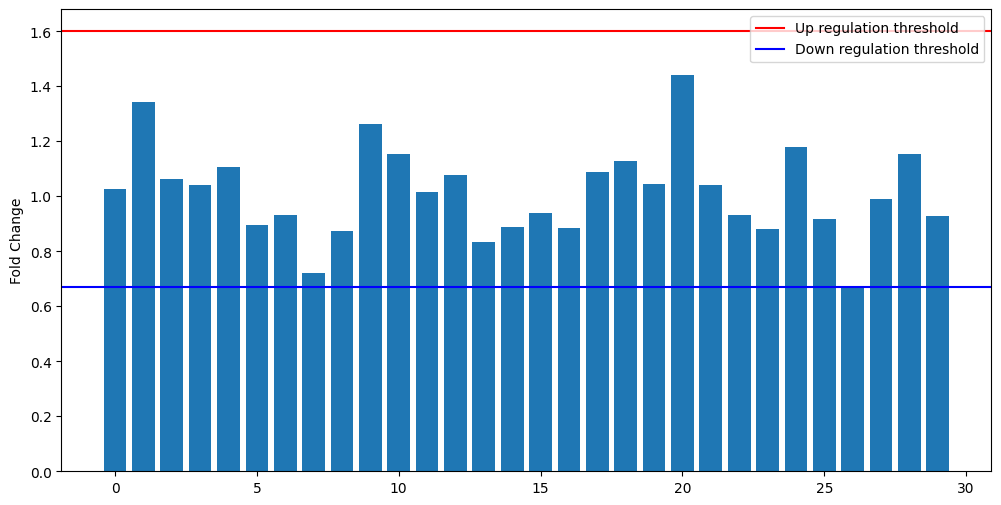

In [27]:
plt.figure(figsize=(12,6))
plt.bar(df.index[:30], df['Fold_Change'][:30])
plt.axhline(y=1.6, color='r', label='Up regulation threshold')
plt.axhline(y=0.67, color='b', label='Down regulation threshold')
plt.ylabel('Fold Change')
plt.legend()
plt.show()